# Autoencoder

A problem of exploring the average eating habits of UK countries whether all countries(UK) have same food pattern or not.



## Data

A dataset of average eating habits between countries in the UK.

Average consumption of 17 types of food in grams per person per week for every country in the UK.

Does any particular country stand out as different.

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD

In [7]:
df = pd.read_csv('/content/Food(UK).csv', index_col=0)
df

,England,Wales,Scotland,N.Ireland
Cheese,105,103,103,66
Carcass_meat,245,227,242,267
Other_meat,685,803,750,586
Fish,147,160,122,93
Fats_and_oils,193,235,184,209
Sugars,156,175,147,139
Fresh_potatoes,720,874,566,1033
Fresh_Veg,253,265,171,143
Other_Veg,488,570,418,355
Processed_potatoes,198,203,220,187


In [8]:
df.transpose() #transpose

,Cheese,Carcass_meat,Other_meat,Fish,Fats_and_oils,Sugars,Fresh_potatoes,Fresh_Veg,Other_Veg,Processed_potatoes,Processed_Veg,Fresh_fruit,Cereals,Beverages,Soft_drinks,Alcoholic_drinks,Confectionery
England,105,245,685,147,193,156,720,253,488,198,360,1102,1472,57,1374,375,54
Wales,103,227,803,160,235,175,874,265,570,203,365,1137,1582,73,1256,475,64
Scotland,103,242,750,122,184,147,566,171,418,220,337,957,1462,53,1572,458,62
N.Ireland,66,267,586,93,209,139,1033,143,355,187,334,674,1494,47,1506,135,41


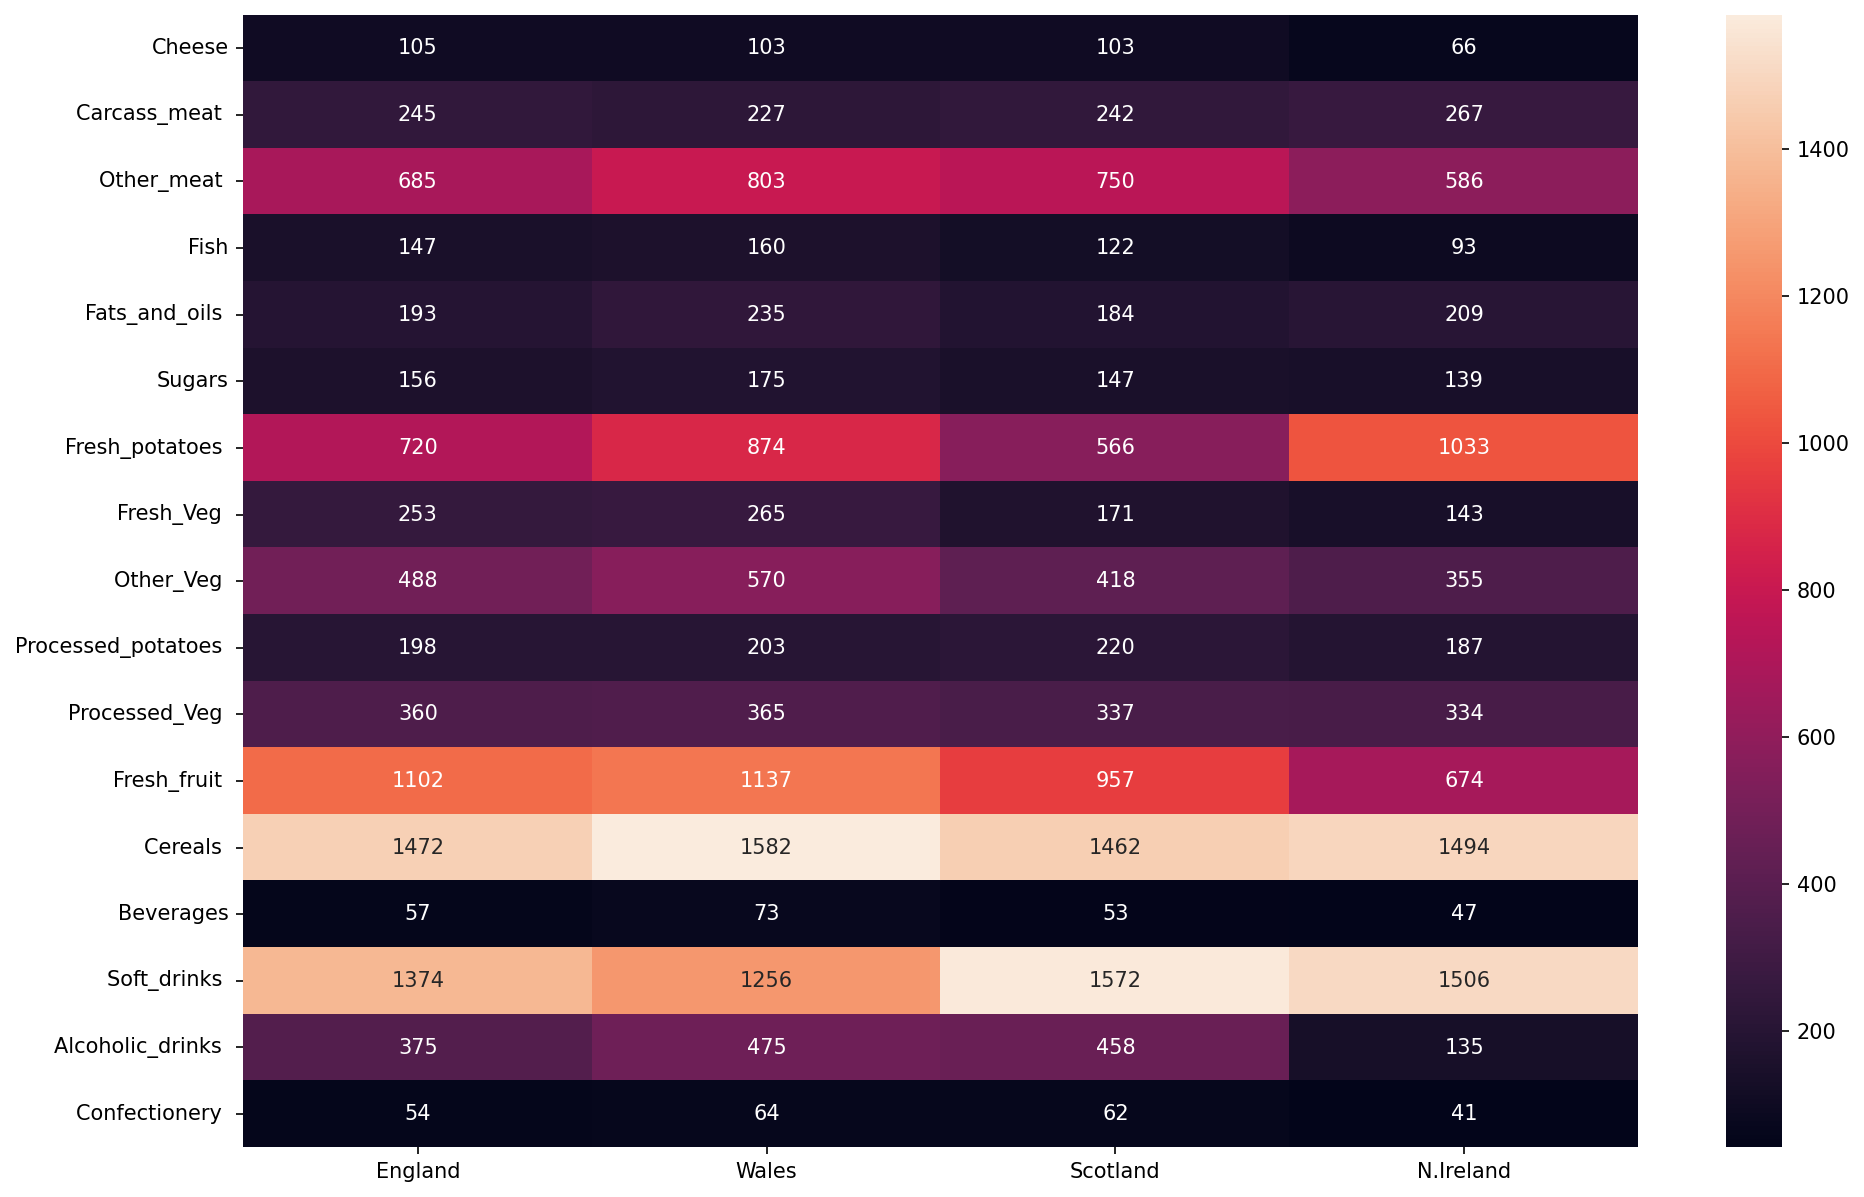

In [9]:
plt.figure(figsize=(15,10), dpi=150)
sns.heatmap(df, annot=True, fmt='.0f');

Does any country has different pattern than the others?
Do any two countries appear to be very similar?

Can't figure out any distinction between countries's food cousumption patterns by looking heatmap.

Reducing dimensionality using autoencoder.


## Building Autoencoder
Our goal will be to reduce the dimensions from 17 --> 2 and see if any countries stand out as very different.



In [11]:
df.shape

(17, 4)

### encoder

In [12]:
encoder = Sequential()

encoder.add(Dense(units=8, activation='relu', input_shape=[17])) #17 => 8
encoder.add(Dense(units=4, activation='relu', input_shape=[8])) # 8 => 4
encoder.add(Dense(units=2, activation='relu', input_shape=[4])) # 4 => 2

### Decoder

In [15]:
decoder = Sequential()

decoder.add(Dense(4, activation='relu', input_shape=[2]))
decoder.add(Dense(8, activation='relu', input_shape=[4]))
decoder.add(Dense(17, activation='relu', input_shape=[8]))

### Combine Encoder + Decoder

Combine the encoder and decoder



In [16]:
autoencoder = Sequential([encoder, decoder])
autoencoder.compile(optimizer=SGD(lr=1.5), loss='mse')

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


## Scaling


In [24]:
df.transpose().head()

,Cheese,Carcass_meat,Other_meat,Fish,Fats_and_oils,Sugars,Fresh_potatoes,Fresh_Veg,Other_Veg,Processed_potatoes,Processed_Veg,Fresh_fruit,Cereals,Beverages,Soft_drinks,Alcoholic_drinks,Confectionery
England,105,245,685,147,193,156,720,253,488,198,360,1102,1472,57,1374,375,54
Wales,103,227,803,160,235,175,874,265,570,203,365,1137,1582,73,1256,475,64
Scotland,103,242,750,122,184,147,566,171,418,220,337,957,1462,53,1572,458,62
N.Ireland,66,267,586,93,209,139,1033,143,355,187,334,674,1494,47,1506,135,41


In [22]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()                  #MinMaxScaler
scaled_df = scaler.fit_transform(df.transpose().values)

In [23]:
scaled_df.shape   # shape should be 17 columns by 4 rows.

(4, 17)

In [19]:
scaled_df

array([[1.        , 0.45      , 0.4562212 , 0.80597015, 0.17647059,
        0.47222222, 0.32976445, 0.90163934, 0.61860465, 0.33333333,
        0.83870968, 0.92440605, 0.08333333, 0.38461538, 0.37341772,
        0.70588235, 0.56521739],
       [0.94871795, 0.        , 1.        , 1.        , 1.        ,
        1.        , 0.65952891, 1.        , 1.        , 0.48484848,
        1.        , 1.        , 1.        , 1.        , 0.        ,
        1.        , 1.        ],
       [0.94871795, 0.375     , 0.75576037, 0.43283582, 0.        ,
        0.22222222, 0.        , 0.2295082 , 0.29302326, 1.        ,
        0.09677419, 0.6112311 , 0.        , 0.23076923, 1.        ,
        0.95      , 0.91304348],
       [0.        , 1.        , 0.        , 0.        , 0.49019608,
        0.        , 1.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.26666667, 0.        , 0.79113924,
        0.        , 0.        ]])

## Train Autoencoder

In [20]:
autoencoder.fit(scaled_df, scaled_df,
                       epochs=15,
                       verbose=1)

Epoch 1/15
1/1 [==============================] - 1s 692ms/step - loss: 0.4196
Epoch 2/15
1/1 [==============================] - 0s 14ms/step - loss: 0.3680
Epoch 3/15
1/1 [==============================] - 0s 20ms/step - loss: 0.3271
Epoch 4/15
1/1 [==============================] - 0s 13ms/step - loss: 0.3004
Epoch 5/15
1/1 [==============================] - 0s 10ms/step - loss: 0.2899
Epoch 6/15
1/1 [==============================] - 0s 13ms/step - loss: 0.2854
Epoch 7/15
1/1 [==============================] - 0s 15ms/step - loss: 0.2830
Epoch 8/15
1/1 [==============================] - 0s 10ms/step - loss: 0.2813
Epoch 9/15
1/1 [==============================] - 0s 9ms/step - loss: 0.2797
Epoch 10/15
1/1 [==============================] - 0s 10ms/step - loss: 0.2782
Epoch 11/15
1/1 [==============================] - 0s 8ms/step - loss: 0.2764
Epoch 12/15
1/1 [==============================] - 0s 15ms/step - loss: 0.2749
Epoch 13/15
1/1 [==============================] - 0s 11ms/ste

## Predict Reduced Dimensionalty Output


In [28]:
# Run the scaled data through encoder and predict the reduced dimensionalty output
encoded_2dim_data = encoder.predict(scaled_df)

encoded_2dim_data.shape 

(4, 2)

In [29]:
encoded_2dim_data

array([[0.       , 2.3658614],
       [0.       , 3.9776552],
       [0.       , 1.3417073],
       [0.       , 0.       ]], dtype=float32)

### Data on Reduced Dimension



In [32]:
countries_index = df.transpose().index
countries_index

Index(['England', 'Wales', 'Scotland', 'N.Ireland'], dtype='object')

In [35]:
# Join the encoded data with the original countries index 


results = pd.DataFrame(data=encoded_2dim_data, index=countries_index, columns=['C1', 'C2'])
results

,C1,C2
England,0.0,2.365861
Wales,0.0,3.977655
Scotland,0.0,1.341707
N.Ireland,0.0,0.000000


In [37]:
results = results.reset_index()

## Plot 


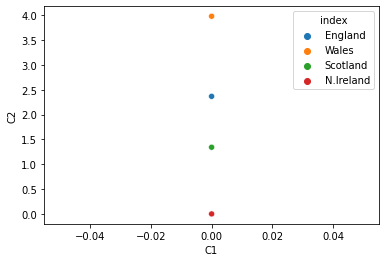

In [38]:
sns.scatterplot(data=results, x='C1', y='C2', hue='index');

Northern Ireland is further away from the other points.

By look at the dataset again, this makes sense: the Northern Irish eat way more grams of fresh potatoes and way fewer of fresh fruits, cheese, fish and alcoholic drinks. 

It is reflecting a fact of real-world geography as Northern Ireland is the only of the four countries not on the island of Great Britain.

In [39]:
df.transpose()

,Cheese,Carcass_meat,Other_meat,Fish,Fats_and_oils,Sugars,Fresh_potatoes,Fresh_Veg,Other_Veg,Processed_potatoes,Processed_Veg,Fresh_fruit,Cereals,Beverages,Soft_drinks,Alcoholic_drinks,Confectionery
England,105,245,685,147,193,156,720,253,488,198,360,1102,1472,57,1374,375,54
Wales,103,227,803,160,235,175,874,265,570,203,365,1137,1582,73,1256,475,64
Scotland,103,242,750,122,184,147,566,171,418,220,337,957,1462,53,1572,458,62
N.Ireland,66,267,586,93,209,139,1033,143,355,187,334,674,1494,47,1506,135,41
